In [1]:
import grpc

import minecraft_pb2_grpc
from minecraft_pb2 import *

channel = grpc.insecure_channel('localhost:5001')
client = minecraft_pb2_grpc.MinecraftServiceStub(channel)

In [23]:
client.fillCube(FillCubeRequest(  # Clear a 20x10x20 working area
    cube=Cube(
        min=Point(x=-256, y=4, z=-256),
        max=Point(x=256, y=14, z=256)
    ),
    type=AIR
))

In [2]:
from tqdm.notebook import tqdm

In [117]:
invalid_blocks = [WATER, LAVA, FLOWING_WATER, FLOWING_LAVA, ICE, FIRE, FROSTED_ICE]
for i in tqdm(range(0, 254)):
    x = i//16
    z = i%16
    
    if i in invalid_blocks:
        continue
    client.spawnBlocks(Blocks(blocks=[Block(position=Point(x=x, y=4, z=z), type=i, orientation=NORTH)]))

  0%|          | 0/254 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [81]:
[i for i in dir(minecraft_pb2) if getattr(minecraft_pb2, i) == 10//2*16+10//2]

['FROSTED_ICE']

In [331]:
a = ['10', 
     '0 1 2 3 4 5 7 9 11 12', 
     '2 6 7 8 9 12 13 14 15', 
     '0 1 10 11 12 13 15', 
     '0 1 3 4 5 8 13', 
     '6 9 11 12 13 14 15', 
     '0 1 2 3 4 5 10 12 14', 
     '4 5 10 11 13 14', 
     '0 1 3 4 5 6 7 8 11 12 13 14 15', 
     '3 4 6 7 8 10 11', 
     '0 5 6 8 9 10 11 12 15', 
     '0 3 4 5 9 11 12 13 15', '1 3 6 7 8 10 11 13 14',
     '5 9 10', '1 4', '4 10 12']


a = [[int(ii) for ii in i.split(' ')] for i in a]

block_ids = []
for x, data in enumerate(a):
    for z in data:
        # print(x, z)
        block_id = x*16+z
        # print(x, z, block_id)
        block_ids.append(block_id)
    
        

In [332]:
a = [getattr(minecraft_pb2, i) for i in dir(minecraft_pb2) if i.endswith('COTTA')]
b = [getattr(minecraft_pb2, i) for i in dir(minecraft_pb2) if i.endswith('BLOCK')][:-1]

In [209]:
pos = 0
for i in tqdm(block_ids):
    x = pos//16
    z = pos%16
    
    if i in invalid_blocks:
        continue
    client.spawnBlocks(Blocks(blocks=[Block(position=Point(x=x, y=4, z=z), type=i, orientation=NORTH)]))
    pos += 1

  0%|          | 0/111 [00:00<?, ?it/s]

In [333]:
[i for i in a+b if i not in block_ids]

[]

In [190]:
len(block_ids), len(a+b)

(112, 37)


'10'
'0 1 2 3 4 5 7 9 11 12 13'
'2 6 7 8 9 12 13 14 15'
'0 1 6 7 10 11 12 13 15'
'0 1 3 4 5 6 7 8 13 14'
'6 9 11 12 13 14 15'
'0 1 2 3 4 5 10 12 14'
'4 5 7 8 10 11 13 14 15'
'0 1 2 3 4 5 6 7 8 11 12 13 14 15'
'3 4 6 7 8 9 10 11 12'
'0 5 6 8 9 10 11 12 15'
'0 3 4 5 9 11 12 13 15'
'1 3 6 7 8 10 11 13 14'
'5 9 10'
'1 4'
'4 5 10 12 13'

In [82]:
len([i for i in dir(minecraft_pb2) if i.endswith('COTTA')])

16

In [91]:
[i for i in dir(minecraft_pb2) if i.endswith('BLOCK')]

['BONE_BLOCK',
 'BRICK_BLOCK',
 'BROWN_MUSHROOM_BLOCK',
 'CHAIN_COMMAND_BLOCK',
 'COAL_BLOCK',
 'COMMAND_BLOCK',
 'DIAMOND_BLOCK',
 'EMERALD_BLOCK',
 'GOLD_BLOCK',
 'HAY_BLOCK',
 'IRON_BLOCK',
 'LAPIS_BLOCK',
 'MELON_BLOCK',
 'NETHER_WART_BLOCK',
 'NOTEBLOCK',
 'PURPUR_BLOCK',
 'QUARTZ_BLOCK',
 'REDSTONE_BLOCK',
 'RED_MUSHROOM_BLOCK',
 'REPEATING_COMMAND_BLOCK',
 'STRUCTURE_BLOCK',
 '_BLOCK']

In [94]:
a = [getattr(minecraft_pb2, i) for i in dir(minecraft_pb2) if i.endswith('COTTA')]
b = [getattr(minecraft_pb2, i) for i in dir(minecraft_pb2) if i.endswith('BLOCK')][:-1]
for i, block_id in enumerate(a+b):
    client.spawnBlocks(Blocks(blocks=[Block(position=Point(x=-10, y=4, z=i), type=block_id, orientation=NORTH)]))

In [95]:
c = [BLUE_GLAZED_TERRACOTTA, GRAY_GLAZED_TERRACOTTA, 
     BROWN_GLAZED_TERRACOTTA, GREEN_GLAZED_TERRACOTTA,
     RED_GLAZED_TERRACOTTA, CYAN_GLAZED_TERRACOTTA, 
     CONCRETE, OBSIDIAN, YELLOW_GLAZED_TERRACOTTA, 
     LIME_GLAZED_TERRACOTTA, STONE,
     ORANGE_GLAZED_TERRACOTTA, STONE]
for i, block_id in enumerate(c):
    client.spawnBlocks(Blocks(blocks=[Block(position=Point(x=-11, y=4, z=i), type=block_id, orientation=NORTH)]))

In [89]:
blocks = client.readCube(Cube(
         min=Point(x=-2, y=4, z=0),
         max=Point(x=-2, y=4, z=6)
))

blocks

blocks {
  position {
    x: -2
    y: 4
  }
  type: WOOL
}
blocks {
  position {
    x: -2
    y: 4
    z: 1
  }
  type: WOOL
}
blocks {
  position {
    x: -2
    y: 4
    z: 2
  }
  type: WOOL
}
blocks {
  position {
    x: -2
    y: 4
    z: 3
  }
  type: WOOL
}
blocks {
  position {
    x: -2
    y: 4
    z: 4
  }
  type: WOOL
}
blocks {
  position {
    x: -2
    y: 4
    z: 5
  }
  type: WOOL
}
blocks {
  position {
    x: -2
    y: 4
    z: 6
  }
  type: AIR
}

In [87]:
WOOL

250

In [88]:
250//16, 250%16

(15, 10)

In [3]:
import math
import numpy as np
import minecraft_pb2
np.array([getattr(minecraft_pb2, i) for i in dir(minecraft_pb2) if type(getattr(minecraft_pb2, i)) is int]).max()

253

In [133]:
Block(position=Point(x=1, y=5, z=1), type=WOOL, orientation=NORTH, color='PINK'),

ValueError: Protocol message Block has no "color" field.

In [1]:
import grpc

import minecraft_pb2_grpc
from minecraft_pb2 import *

channel = grpc.insecure_channel('localhost:5001')
client = minecraft_pb2_grpc.MinecraftServiceStub(channel)

client.fillCube(FillCubeRequest(  # Clear a 20x10x20 working area
    cube=Cube(
        min=Point(x=-10, y=4, z=-10),
        max=Point(x=10, y=14, z=10)
    ),
    type=AIR
))
client.spawnBlocks(Blocks(blocks=[  # Spawn a flying machine
    # Lower layer
    Block(position=Point(x=1, y=5, z=1), type=PISTON, orientation=NORTH),
    Block(position=Point(x=1, y=5, z=0), type=SLIME, orientation=NORTH),
    Block(position=Point(x=1, y=5, z=-1), type=STICKY_PISTON, orientation=SOUTH),
    Block(position=Point(x=1, y=5, z=-2), type=PISTON, orientation=NORTH),
    Block(position=Point(x=1, y=5, z=-4), type=SLIME, orientation=NORTH),
    # Upper layer
    Block(position=Point(x=1, y=6, z=0), type=REDSTONE_BLOCK, orientation=NORTH),
    Block(position=Point(x=1, y=6, z=-4), type=REDSTONE_BLOCK, orientation=NORTH),
    # Activate
    Block(position=Point(x=1, y=6, z=-1), type=QUARTZ_BLOCK, orientation=NORTH),
]))

ModuleNotFoundError: No module named 'minecraft_pb2_grpc'

In [4]:
import matplotlib.pyplot as plt
import cv2

In [352]:
raw_block_img = plt.imread('raw_block_img.png')
a = raw_block_img.copy()

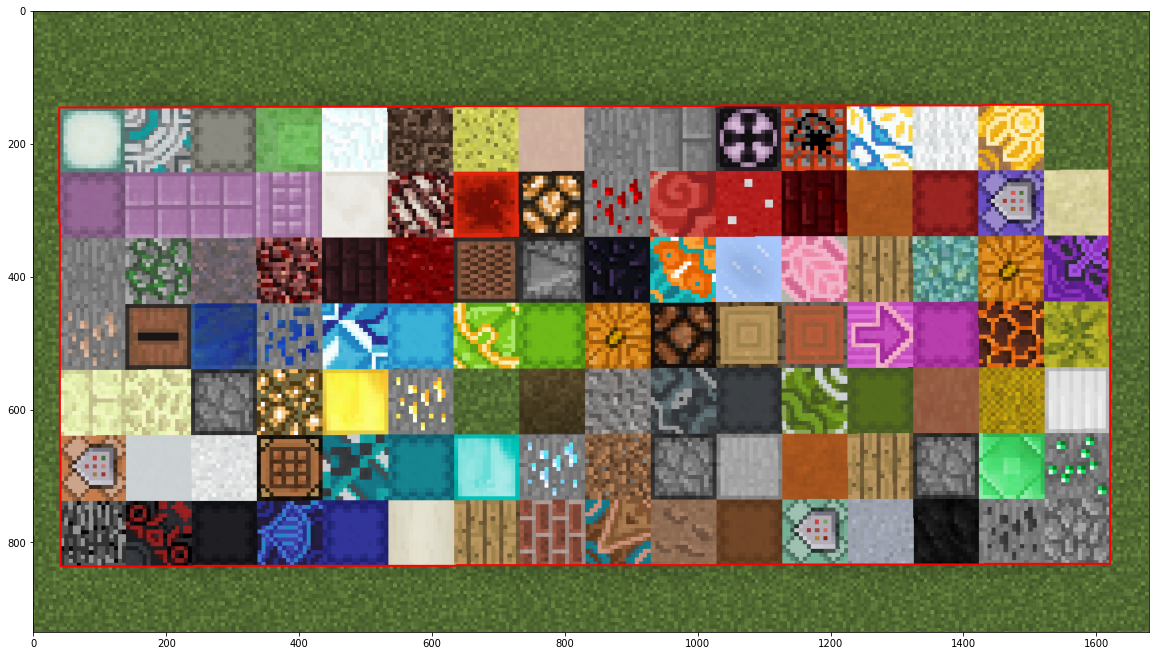

In [353]:
p1 = np.array([41, 836])
p2 = np.array([1621, 832])
p3 = np.array([39, 146])
p4 = np.array([1620, 142])


cv2.line(a, p1, p2, color=(1., 0, 0), thickness=2)
cv2.line(a, p2, p4, color=(1., 0, 0), thickness=2)
cv2.line(a, p1, p3, color=(1., 0, 0), thickness=2)
cv2.line(a, p3, p4, color=(1., 0, 0), thickness=2)

plt.figure(figsize=(20,20))
plt.imshow(a)

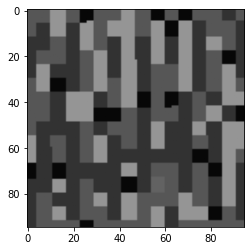

In [354]:
def calc_sub_image(x, z):
    i = np.array([(p4[0]-p1[0])/16, 0])
    j = np.array([0, (p4[1]-p1[1])/7 ])
    
    
    s = p1 + z*i + x*j
    e = p1 + (z+1)*i + (x+1)*j
    
    s, e = (s+.5).astype(int), (e+.5).astype(int)
    
    pad = 2
    return raw_block_img[e[1]+pad:s[1]-pad, s[0]+pad: e[0]-pad]
    


plt.imshow(calc_sub_image(0, 0))

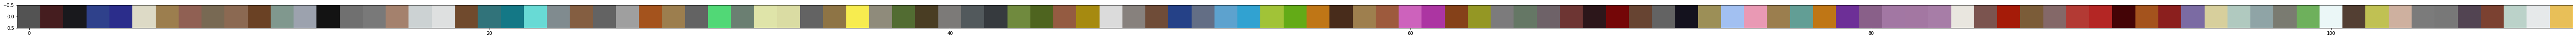

In [355]:
plt.figure(figsize=(100, 1))
plt.imshow(np.stack(block_cols)[None])

  0%|          | 0/111 [00:00<?, ?it/s]

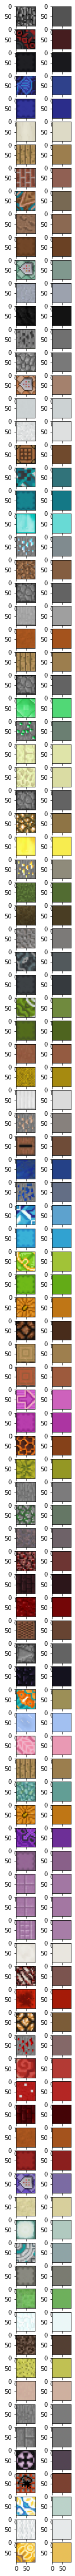

In [356]:

plt.figure(figsize=(2, 80))
i = 1


block_cols = []

for pos, block_id in enumerate(tqdm(block_ids)):
    names = [name for name in dir(minecraft_pb2) if getattr(minecraft_pb2, name)==block_id]
    # print(block_id, names)
    
    x = pos//16
    z = pos%16
    
    
    subimg = calc_sub_image(x, z)
    solidimg = np.zeros_like(subimg)
    solidcol = subimg.mean(axis=(0, 1))
    block_cols.append(solidcol)
    solidimg[:, :] = [solidcol]
    plt.subplot(len(block_ids), 2, i)
    plt.imshow(subimg)
    plt.subplot(len(block_ids), 2, i+1)
    plt.imshow(solidimg)
    i+=2
    
    
    
plt.show()
# imgs = np.stack(imgs).reshape(len(imgs)//2, 2, *imgs[0].shape)
    
    
    
    
    

In [24]:
import block_data

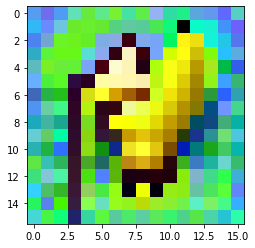

In [25]:
img = plt.imread('imgs/banana.png')
img = img[::img.shape[0]//16, ::img.shape[1]//16]
cols, block_ids = block_data.get_mc_structure(img)
plt.imshow(img)

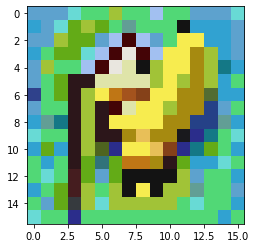

In [26]:
plt.imshow(cols)

In [27]:
block_data.mc_spawn_block_ids(block_ids, 20, 10, 20)

In [28]:
a = block_data.all_mc_block_cols